# Cryptocurrencies

In [1]:
import pandas as pd 
import glob
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv(r'C:\Users\User\Desktop\crypto\project-altcoinpriceprediction\data\cryptocurrencypricehistory\coin_Bitcoin.csv').set_index('Date')[['Close']]
df = df.rename(columns={"Close":"Bitcoin"})

In [8]:
columns = []
path = r"C:\Users\User\Desktop\crypto\project-altcoinpriceprediction\data\cryptocurrencypricehistory\*.csv"
for fname in glob.glob(path):
    data = pd.read_csv(fname).set_index('Date')
    cryptocurrency = fname.split('coin_')[1].split('.csv')[0]
    if len(data)>1500 and cryptocurrency != 'Bitcoin':
        data = data.rename(columns={"Close":cryptocurrency})
        columns.append(cryptocurrency)
        df=pd.merge(df,data[cryptocurrency], how='inner', left_index=True, right_index=True)

## Correlation matrix of different Cryptocurrencies

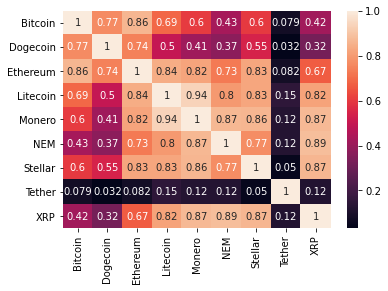

In [6]:
corrMatrix = df.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

# Break correlation into 4 seasons
- Spring: March, April, May
- Summer: June, July, August
- Fall: September, October, November
- Winter: December, January, February

In [47]:
winter = ['12','01','02']
spring = ['03','04','05']
summer = ['06','07','08']
fall = ['09','10','11']
def seasonality(number):
    if number in winter:
        return 'winter'
    if number in spring:
        return 'spring'
    if number in summer:
        return 'summer'
    if number in fall:
        return 'fall'

In [77]:
columns = []
path = r"C:\Users\User\Desktop\crypto\project-altcoinpriceprediction\data\cryptocurrencypricehistory\*.csv"
for fname in glob.glob(path):
    data = pd.read_csv(fname).set_index('Date')
    cryptocurrency = fname.split('coin_')[1].split('.csv')[0]
    if len(data)>1500 and cryptocurrency != 'Bitcoin':
        columns.append(cryptocurrency)

In [75]:
def seasonize(crypto):
    df = pd.read_csv(r'C:\Users\User\Desktop\crypto\project-altcoinpriceprediction\data\cryptocurrencypricehistory\coin_'+crypto+'.csv')
    df['date_str'] = df['Date'].astype(str)
    df['season'] = df.apply(lambda x : seasonality(x['date_str'].split("-")[1]),axis=1)
    df = df.set_index('Date')[['Close','season']]
    df = df.rename(columns={"Close":crypto})
    return df

In [76]:
seasonize('Bitcoin')

,Bitcoin,season
Date,,
2013-04-29 23:59:59,144.539993,spring
2013-04-30 23:59:59,139.000000,spring
2013-05-01 23:59:59,116.989998,spring
2013-05-02 23:59:59,105.209999,spring
2013-05-03 23:59:59,97.750000,spring
...,...,...
2021-02-23 23:59:59,48824.426869,winter
2021-02-24 23:59:59,49705.333316,winter
2021-02-25 23:59:59,47093.853019,winter


In [78]:
columns

['Dogecoin',
 'Ethereum',
 'Litecoin',
 'Monero',
 'NEM',
 'Stellar',
 'Tether',
 'XRP']